# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
print("This data is related to 17 campaigns.")

This data is related to 17 campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Check for missiong values
display(df.isnull().sum())

# Check dtypes
display(df.dtypes)

# Show the data
display(df.head())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


It appears that we may need to exclude the duration variable, as this may
not be known at before the call is performed. There are a number of categorical
variables that will have to be encoded before modeling. We do not have any missing
values so things should be okay

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective is to predict if a client will subscribe to term deposit.
This will allow the business to execute a targeted marketing campaign and maximize
its return on investment.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
# Separate the data into the X, y datasets
X, y = df.drop('y', axis=1), df[['y']]
display(X.head())
display(y.value_counts())
display(np.unique(y))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


y  
no     36548
yes     4640
Name: count, dtype: int64

array(['no', 'yes'], dtype=object)

In [8]:
# Recode Y
y['y'] = np.where(y['y'] == 'yes', 1, 0)


C:\Users\jonat\AppData\Local\Temp\ipykernel_7336\389858465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = np.where(y['y'] == 'yes', 1, 0)


In [9]:
# Encode the descriptive features
ct = make_column_transformer((StandardScaler(), make_column_selector(dtype_include=np.number)),
                             (OneHotEncoder(drop='first'), make_column_selector(dtype_include=object)))
X = pd.DataFrame(ct.fit_transform(X), columns=ct.get_feature_names_out())
X.head()

,standardscaler__age,standardscaler__duration,standardscaler__campaign,standardscaler__pdays,standardscaler__previous,standardscaler__emp.var.rate,standardscaler__cons.price.idx,standardscaler__cons.conf.idx,standardscaler__euribor3m,standardscaler__nr.employed,...,onehotencoder__month_may,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__day_of_week_mon,onehotencoder__day_of_week_thu,onehotencoder__day_of_week_tue,onehotencoder__day_of_week_wed,onehotencoder__poutcome_nonexistent,onehotencoder__poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
# Create a test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
# Build and fit a dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_test_preds = dummy_clf.predict(X_test)
type(dummy_test_preds)
display(dummy_test_preds)

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 0.98, 'Dummy Classifier Confusion Matrix')

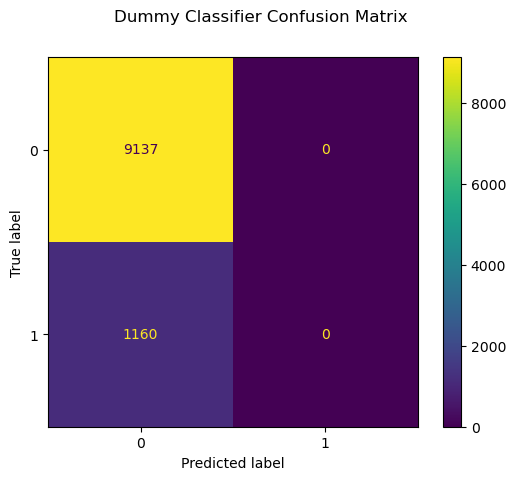

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test, dummy_test_preds)).plot()
plt.suptitle('Dummy Classifier Confusion Matrix')

In [13]:
# Print the classification report
print(classification_report(y_test, dummy_test_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9137
           1       0.00      0.00      0.00      1160

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297



c:\Users\jonat\miniforge3\envs\my-py-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\miniforge3\envs\my-py-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\miniforge3\envs\my-py-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
# Initialize Estimators
standard_scaler = StandardScaler()
lr_clf = LogisticRegression(n_jobs=-1)

# Fit a pipeline    
lr_pipe = Pipeline([
    ('standard_scaler', standard_scaler),
    ('logistic_regression', lr_clf)
])

lr_pipe.fit(X_train, y_train)
lr_preds = lr_pipe.predict(X_test)

c:\Users\jonat\miniforge3\envs\my-py-env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Problem 9: Score the Model

What is the accuracy of your model?

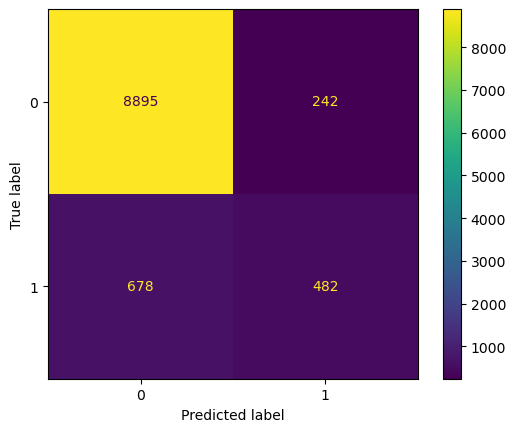

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_preds)).plot()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9137
           1       0.67      0.42      0.51      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

If there were a feature denoting gender it should be dropped so that the model does
not discriminate.

Training Classification Report ****************
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27411
           1       0.73      0.40      0.52      3480

    accuracy                           0.92     30891
   macro avg       0.83      0.69      0.74     30891
weighted avg       0.91      0.92      0.90     30891

Test Classification Report ********************
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9137
           1       0.58      0.30      0.39      1160

    accuracy                           0.90     10297
   macro avg       0.75      0.64      0.67     10297
weighted avg       0.88      0.90      0.88     10297



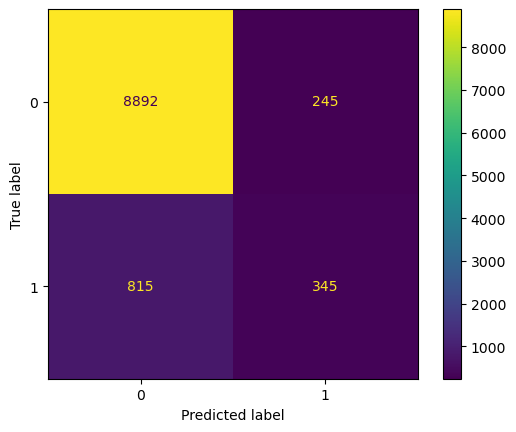

In [17]:
# Fit a KNN model
knn_clf = KNeighborsClassifier()
poly_features = PolynomialFeatures(degree=2)
standard_scaler = StandardScaler()
param_grid = {'knn_clf__n_neighbors': [1, 3, 5 , 7]}

# Build Pipeline
knn_pipe = Pipeline([('poly_features', poly_features),
                     ('standard_scaler', standard_scaler),
                     ('knn_clf', knn_clf)])

# Execute grid search
knn_grid = GridSearchCV(knn_pipe, param_grid=param_grid, n_jobs=-1)
knn_grid.fit(X_train, y_train.to_numpy().ravel())
knn_preds = knn_grid.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, knn_preds)).plot()

print('Training Classification Report ****************')
print(classification_report(y_train, knn_grid.predict(X_train)))
print('Test Classification Report ********************')
print(classification_report(y_test, knn_preds))

Training Classification Report ****************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27411
           1       0.67      0.43      0.52      3480

    accuracy                           0.91     30891
   macro avg       0.80      0.70      0.74     30891
weighted avg       0.90      0.91      0.90     30891

Test Classification Report ********************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9137
           1       0.66      0.41      0.51      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



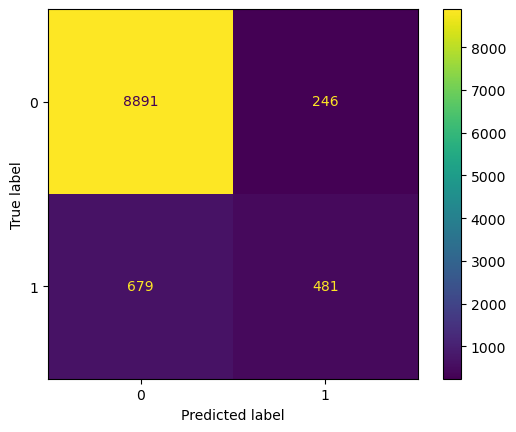

In [18]:
# Initialize Estimators
standard_scaler = StandardScaler()
lr_clf = LogisticRegression(max_iter=10_000)
param_grid = {'lr_clf__C':[.001, .01, 1, 10, 100, 1000]}

# Fit a pipeline    
lr_pipe = Pipeline([
    ('standard_scaler', standard_scaler),
    ('lr_clf', lr_clf)
])

# Execute grid search
lr_grid = GridSearchCV(lr_pipe, param_grid=param_grid, n_jobs=-1)
lr_grid.fit(X_train, y_train.to_numpy().ravel())

# Get predictions
lr_preds = lr_grid.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, lr_preds)).plot()

print('Training Classification Report ****************')
print(classification_report(y_train, lr_grid.predict(X_train)))
print('Test Classification Report ********************')
print(classification_report(y_test, lr_grid.predict(X_test)))

Training Classification Report ****************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27411
           1       0.68      0.13      0.22      3480

    accuracy                           0.90     30891
   macro avg       0.79      0.56      0.58     30891
weighted avg       0.88      0.90      0.86     30891

Test Classification Report ********************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9137
           1       0.67      0.12      0.21      1160

    accuracy                           0.89     10297
   macro avg       0.79      0.56      0.58     10297
weighted avg       0.87      0.89      0.86     10297



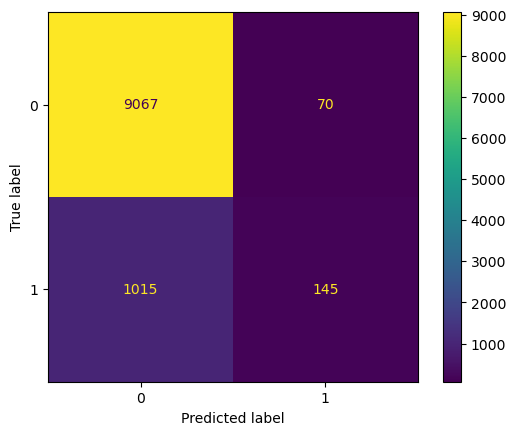

In [19]:
# Initialize Estimators
standard_scaler = StandardScaler()
dt_clf = DecisionTreeClassifier()
param_grid = {'dt_clf__min_impurity_decrease': [0.001, 0.01, 0.02, 0.03, 0.05],
              'dt_clf__max_depth': [2, 5, 10, 20],
              'dt_clf__max_features': ['sqrt', 'log2'],
              'dt_clf__min_samples_split': [0.1, 0.2, 0.05],
              'dt_clf__criterion': ['gini', 'entropy']}

# Define Pipeline
dt_pipe = Pipeline([('standard_scaler', standard_scaler),
                     ('dt_clf', dt_clf)])

# Grid Search
dt_grid = GridSearchCV(dt_pipe, param_grid=param_grid, n_jobs=-1)
dt_grid.fit(X_train, y_train.to_numpy().ravel())

# Get predictions
dt_preds = dt_grid.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, dt_preds)).plot()

print('Training Classification Report ****************')
print(classification_report(y_train, dt_grid.predict(X_train)))
print('Test Classification Report ********************')
print(classification_report(y_test, dt_grid.predict(X_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Classification Report ****************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27411
           1       0.79      0.47      0.59      3480

    accuracy                           0.93     30891
   macro avg       0.86      0.73      0.77     30891
weighted avg       0.92      0.93      0.92     30891

Test Classification Report ********************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9137
           1       0.67      0.37      0.48      1160

    accuracy                           0.91     10297
   macro avg       0.79      0.67      0.71     10297
weighted avg       0.90      0.91      0.90     10297



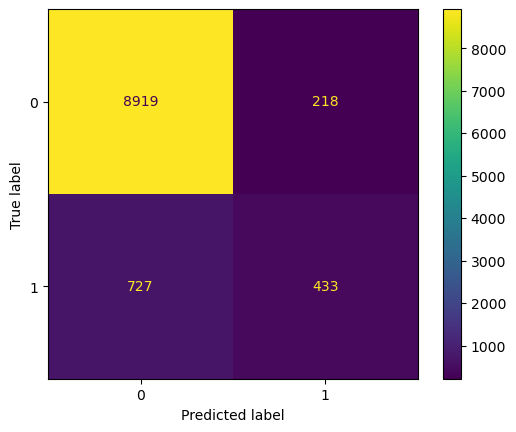

In [21]:
# Initialize Estimator
standard_scaler = StandardScaler()
svc = SVC()
param_grid = {'svc__C':[.01, 1, 100],
              'svc__kernel': ['linear', 'poly', 'rbf']}

# Define Pipeline
svc_pipe = Pipeline([('standard_scaler', standard_scaler),
                     ('svc', svc)])

# Grid Search
svc_grid = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=5, n_jobs=-1)
svc_grid.fit(X_train, y_train.to_numpy().ravel())

# Get predictions
svc_preds = svc_grid.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, svc_preds)).plot()

print('Training Classification Report ****************')
print(classification_report(y_train, svc_grid.predict(X_train)))
print('Test Classification Report ********************')
print(classification_report(y_test, svc_grid.predict(X_test)))



##### Questions